# Datasets for Student projects

In this file, we prepare simplified datasets for student exercises based on the galaxy zoo - the galaxy challenge competition on kaggle
https://www.kaggle.com/c/galaxy-zoo-the-galaxy-challenge

In the galaxy zoo project, participants are shown galaxy images and asked questions about the morphology of the central galaxy. 
Depending on their answer, they are asked the next question, which results in a complicated hierarchy of labels, which can be seen here
https://www.kaggle.com/c/galaxy-zoo-the-galaxy-challenge/overview/the-galaxy-zoo-decision-tree



This dataset contains about 60,000 RGB images of galaxies together with a label vector of 37 dimensions.
These labels correspond to answers given to 11 Questions. Each label is a number between 0 and 1 and shows the amount of participants who gave this answer relative to the number of participants that saw the given image.
The galaxy challenge asks competitors to provide a model that reproduces these labels.


In order to run this notebook, you have to download and extract the dataset (images: images_training_rev1.zip, labels: training_solutions_rev1.zip) from here
https://www.kaggle.com/c/galaxy-zoo-the-galaxy-challenge/data

Note that the image files have 424x424 pixels, while the galaxies are contained within the central 207x207 pixels. It is useful to crop the central part and reduce to 64x64 pixels.

In [3]:
## file locations
image_folder = "data/images/images_training_rev1/"
labels_file = "data/training_solutions_rev1.csv"

In [63]:
!pip install torch

In [4]:
from glob import glob
import shutil
import os

import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

def get_labels_train(file_galaxy_labels) -> torch.Tensor:
    df_galaxy_labels = pd.read_csv(file_galaxy_labels)
    return df_galaxy_labels


target_labels = get_labels_train(labels_file)


class GalaxyZooDataset(Dataset):
    def __init__(self):
        file_list = glob(image_folder + "*")
        file_list.sort()
        print(len(file_list))
        self.data = [[file, label.values] for file, (_, label) in zip(file_list, target_labels.iterrows())]

    def __len__(self) -> int:
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]


dataset = GalaxyZooDataset()

data_loader_original = DataLoader(dataset, batch_size=32, shuffle=False, drop_last=False)
    

61578


In [65]:
len(dataset)

61578

In [66]:
len(dataset.__getitem__(0)[1])

38

In [67]:
target_labels ## the labels correspond to images GalaxyID.jpg

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,...,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,...,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,...,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


## First Exercise

In the first exercise, we only consider the top-level question (3 answers) and samples where at least 80 % of participants gave the same answer.
We assume this to be a certain classification and transform them to one-hot encoded labels.
The task is to provide a classifier that correctly classifies the images.

In [5]:
## loop through files
## check for condition (max of first three labels is >= 0.8)
## if true, create hot-encoded label
## copy file to folder
## save all labels in csv file

folder_1 = "data/exercise_1/"
folder_images_1 = folder_1 + "images/"
file_labels_1 = folder_1 + "labels.csv"

def condition(label):
    """ for (N,L)-tensor of labels (float: 0-1) return (N,1)-boolean-tensor 
    with True if one of first three floats is >= 0.8 """
    ground = label[:,1:4] >= 0.8
    return torch.sum(ground, dim=1).bool() #, keepdims=True)

files_1 = []
labels_1 = []

for files, label in data_loader_original:
    cond = condition(label)
    files_1 += [f for f, c in zip(files, cond) if c]
    labels_1 += [torch.round(label[torch.where(cond)[0],:4])]

labels_1 = torch.cat(labels_1)
labels_1 = pd.DataFrame(labels_1.numpy(), columns=target_labels.columns[:4])

In [69]:
files_1

['data/images/images_training_rev1/100090.jpg',
 'data/images/images_training_rev1/100134.jpg',
 'data/images/images_training_rev1/100237.jpg',
 'data/images/images_training_rev1/100263.jpg',
 'data/images/images_training_rev1/100322.jpg',
 'data/images/images_training_rev1/100335.jpg',
 'data/images/images_training_rev1/100380.jpg',
 'data/images/images_training_rev1/100458.jpg',
 'data/images/images_training_rev1/100479.jpg',
 'data/images/images_training_rev1/100520.jpg',
 'data/images/images_training_rev1/100672.jpg',
 'data/images/images_training_rev1/100673.jpg',
 'data/images/images_training_rev1/100724.jpg',
 'data/images/images_training_rev1/100727.jpg',
 'data/images/images_training_rev1/100765.jpg',
 'data/images/images_training_rev1/100801.jpg',
 'data/images/images_training_rev1/100813.jpg',
 'data/images/images_training_rev1/100821.jpg',
 'data/images/images_training_rev1/100859.jpg',
 'data/images/images_training_rev1/100867.jpg',
 'data/images/images_training_rev1/10095

In [70]:
os.makedirs(folder_images_1, exist_ok=True)

[shutil.copy(file, folder_images_1 + file.split('/')[-1]) for file in files_1]
    
labels_1.to_csv('data/exercise_1/labels')

In [7]:
img_dir = "data/exercise_1/images/"
label_path = "data/exercise_1/labels.csv"
val_split = 0.2


In [8]:
labels_df = pd.read_csv(label_path).set_index('GalaxyID')[['Class1.1','Class1.2','Class1.3']]
labels_df

,Class1.1,Class1.2,Class1.3
GalaxyID,,,
100090.0,1.0,0.0,0.0
100134.0,0.0,1.0,0.0
100237.0,0.0,1.0,0.0
100263.0,0.0,1.0,0.0
100322.0,0.0,1.0,0.0
...,...,...,...
999786.0,1.0,0.0,0.0
999795.0,0.0,1.0,0.0
999875.0,0.0,1.0,0.0


In [9]:
import glob
files = glob.glob(f'{img_dir}/*')
print(len(files))

24275


In [ ]:
!pip install Pillow

In [ ]:
!pip install torchvision

In [ ]:
!pip install matplotlib

In [10]:
import random
import matplotlib.pyplot as plt
from torchvision import transforms
import numpy as np
def plot_random_galaxy(path, sample = 5):
    random_image=random.sample(os.listdir(path),sample)
    
    plt.figure(figsize=(16,5))
    for i in range(sample):    
        plt.subplot(1,sample,i+1)
        img=Image.open(path+'/'+random_image[i])
        img_array = np.array(img)
        plt.imshow(img)
        plt.title(f'Class: {random_image[i]}\nShape: {img_array.shape}')
        plt.axis(False) 

NameError: name 'Image' is not defined

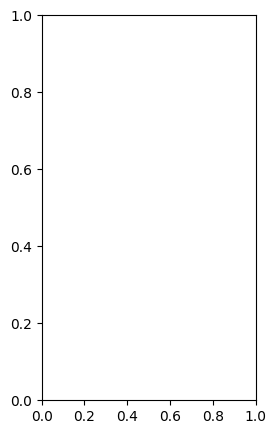

In [11]:
plot_random_galaxy('data/exercise_1/images/')

In [44]:
from skimage.transform import resize
def get_image(path, x1,y1, shape, crop_size):
    x = plt.imread(path)
    x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]
    x = resize(x, shape)
    x = x/255.
    return x

ModuleNotFoundError: No module named 'skimage'

In [12]:
from PIL import Image
import torch
from torchvision import transforms

def decode_downsample(filepath, size=64):
    '''Function to take a file path, open the image, decode, downsample, and return as greyscale
    size = size in w and h for downsample'''
    
    img = Image.open(filepath)
    
    # Define a transformation pipeline
    transform = transforms.Compose([
        transforms.Resize((size, size)), 
        transforms.ToTensor(),  
        transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])         
    ])
    img = transform(img)
    
    return img

In [13]:
decode_downsample('data/exercise_1/images/999502.jpg')

tensor([[[-0.9608, -0.9373, -0.9373,  ..., -0.7098, -0.7490, -0.8275],
         [-0.9529, -0.9451, -0.9608,  ..., -0.7647, -0.7804, -0.7961],
         [-0.9059, -0.9373, -0.9529,  ..., -0.7412, -0.7804, -0.7569],
         ...,
         [-0.8980, -0.9137, -0.9216,  ..., -0.8902, -0.8902, -0.9216],
         [-0.9216, -0.9059, -0.9294,  ..., -0.8980, -0.8980, -0.9216],
         [-0.9216, -0.8980, -0.9294,  ..., -0.9137, -0.9373, -0.9294]],

        [[-0.9529, -0.9059, -0.8980,  ..., -0.7490, -0.8275, -0.8902],
         [-0.9529, -0.9137, -0.9373,  ..., -0.8039, -0.8588, -0.8824],
         [-0.9137, -0.9373, -0.9608,  ..., -0.7961, -0.8745, -0.8510],
         ...,
         [-0.8980, -0.9137, -0.9137,  ..., -0.8039, -0.8275, -0.8353],
         [-0.9216, -0.8980, -0.9216,  ..., -0.7725, -0.7961, -0.8431],
         [-0.9059, -0.8824, -0.9216,  ..., -0.7490, -0.8118, -0.8196]],

        [[-0.9765, -0.9373, -0.9373,  ..., -0.6235, -0.7333, -0.8118],
         [-0.9686, -0.9451, -0.9608,  ..., -0

In [14]:
labels_now = pd.read_csv('data/exercise_1/labels.csv')
labels_now

,Unnamed: 0,GalaxyID,Class1.1,Class1.2,Class1.3
0,0,100090.0,1.0,0.0,0.0
1,1,100134.0,0.0,1.0,0.0
2,2,100237.0,0.0,1.0,0.0
3,3,100263.0,0.0,1.0,0.0
4,4,100322.0,0.0,1.0,0.0
...,...,...,...,...,...
24270,24270,999786.0,1.0,0.0,0.0
24271,24271,999795.0,0.0,1.0,0.0
24272,24272,999875.0,0.0,1.0,0.0
24273,24273,999950.0,1.0,0.0,0.0


In [15]:
import numpy as np
data_now = np.array(labels_now)
img_tensors = []
for i in data_now:
    file_loc = 'data/exercise_1/images/'+str(int(np.array(i)[1]))+'.jpg'
    img = decode_downsample(file_loc)
    img_tensors.append(img)

labels_now['img'] = img_tensors

In [ ]:

def class_to_index(row):
    if row['Class1.1'] == 1:
        return 0
    elif row['Class1.2'] == 1:
        return 1
    elif row['Class1.3'] == 1:
        return 2
    else:
        return 3

class CustomGalaxyDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img = self.dataframe.iloc[idx]['img']
        labels = self.dataframe.iloc[idx][['Class1.1', 'Class1.2', 'Class1.3']].values.astype('float32')
        # result = class_to_index(self.dataframe.iloc[idx])
        # labels = result
        
        return img, torch.tensor(labels)
        # return img, labels

In [ ]:
dataset = CustomGalaxyDataset(labels_now)

In [ ]:
for i in dataset:
    print(i)
    break

(tensor([[[-0.9765, -0.9451, -0.9608,  ..., -0.9765, -0.9686, -0.9765],
         [-0.9765, -0.9686, -0.9765,  ..., -0.9608, -0.9765, -0.9686],
         [-0.9608, -0.9686, -0.9843,  ..., -0.9608, -0.9765, -0.9843],
         ...,
         [-0.9686, -0.9529, -0.9843,  ..., -0.9529, -0.9843, -0.9765],
         [-0.9451, -0.9373, -0.9765,  ..., -0.9843, -0.9686, -0.9765],
         [-0.9686, -0.9216, -0.8902,  ..., -0.9765, -0.9843, -0.9765]],

        [[-0.9608, -0.9294, -0.9451,  ..., -0.9529, -0.9529, -0.9451],
         [-0.9608, -0.9529, -0.9608,  ..., -0.9451, -0.9686, -0.9608],
         [-0.9451, -0.9529, -0.9686,  ..., -0.9451, -0.9686, -0.9765],
         ...,
         [-0.9529, -0.9373, -0.9686,  ..., -0.9529, -0.9765, -0.9608],
         [-0.9373, -0.9216, -0.9451,  ..., -0.9765, -0.9608, -0.9608],
         [-0.9608, -0.9529, -0.9294,  ..., -0.9608, -0.9686, -0.9608]],

        [[-0.9843, -0.9529, -0.9686,  ..., -0.9765, -0.9765, -0.9765],
         [-0.9843, -0.9765, -0.9843,  ..., -

In [ ]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
for i,j in dataloader:
    print(j.shape)
    break

torch.Size([32, 3])


In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = Net()

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [56]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 100.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 738.9 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 4.0 MB/s eta 0:00:0000:0100:010m


In [61]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(labels_now, test_size=0.2, random_state=42)

# Create datasets and dataloaders for training and validation
train_dataset = CustomGalaxyDataset(train_df)
val_dataset = CustomGalaxyDataset(val_df)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

# Training loop with validation
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_dataloader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss/len(train_dataloader):.4f}, Val Loss: {val_loss/len(val_dataloader):.4f}')

print('Finished Training')


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x2704 and 400x120)